# Data Analysis
This notebook is used to analyze the data collected from live runs. It includes various visualizations and statistical analyses to understand the performance of the runner

## TOC:
### [Looking at Overall Performance](#looking-at-overall-performance)
* [Relation Between 2 Variables](#relation-between-2-variables)
* [Pearsons Correlation Matrix](#pearsons-correlation-matrix)
### [Performance from Specific Runs](#performance-from-specific-runs)

In [1]:
from utilis.helper import extract_global_json, extract_json
import os
import matplotlib.pyplot as plt
import pandas as pd

## Looking at Overall Performance
This section will focus on analyzing the overall performance of the runner across multiple runs, including visualizations and statistical summaries.

### Relation between 2 variables

Text(0, 0.5, 'pressure')

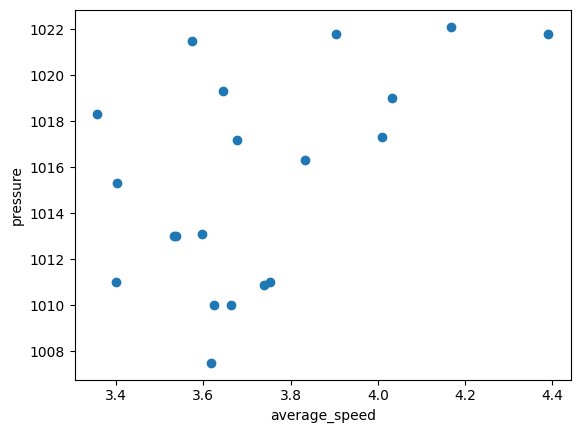

In [20]:
num_runs = extract_global_json("num_runs")
output_folder = extract_global_json("output_folder")

# initialize a list
lst_x = []
lst_y = []

x = "average_speed"
y = "pressure"
# Load all JSON files and flatten them into a list of dicts
for folder in os.listdir(output_folder):
    json_file = os.path.join(output_folder, folder, f"{folder}_overall.json")
    d = extract_json(json_file)
    # Flatten weather dict if present
    flat = d.copy()
    if "weather" in flat and isinstance(flat["weather"], dict):
        for k, v in flat["weather"].items():
            flat[f"{k}"] = v
        del flat["weather"]

    # Append 
    x_data = flat[x]
    y_data = flat[y]
    lst_x.append(x_data)
    lst_y.append(y_data)

# create a scatter plot
plt.scatter(lst_x, lst_y)
plt.xlabel(x)
plt.ylabel(y)

### Pearsons Correlation Matrix

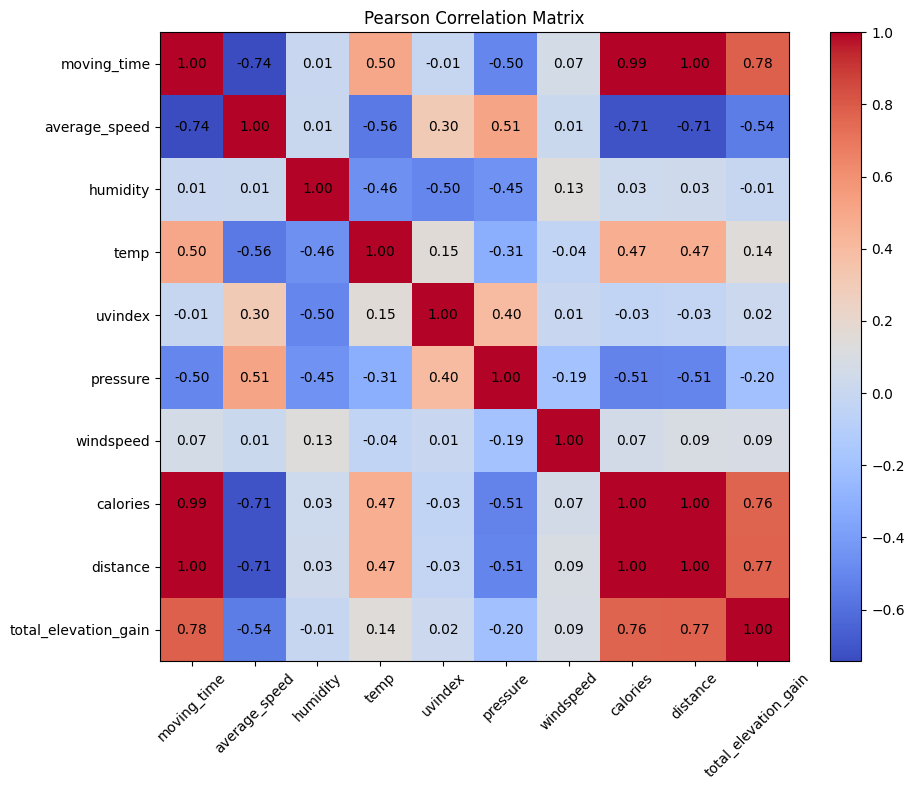

In [21]:
output_folder = extract_global_json("output_folder")
# all variables to include
analyzable_columns = [
    "moving_time",
    "average_speed", 
    "humidity",
    "temp",
    "uvindex",
    "pressure",
    "windspeed",
    "calories", 
    "distance",
    "total_elevation_gain",
    ]

# Load all JSON files and flatten them into a list of dicts
all_flat_data = []
for folder in os.listdir(output_folder):
    json_file = os.path.join(output_folder, folder, f"{folder}_overall.json")
    d = extract_json(json_file)
    # Flatten weather dict if present
    flat = d.copy()
    if "weather" in flat and isinstance(flat["weather"], dict):
        for k, v in flat["weather"].items():
            flat[f"{k}"] = v
        del flat["weather"]
    all_flat_data.append(flat)

# Create DataFrame
df_all = pd.DataFrame(all_flat_data)

# Compute Pearson correlation matrix for analyzable columns
corr_matrix = df_all[analyzable_columns].corr(method="pearson")

# Show correlation matrix
plt.figure(figsize=(10, 8))
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
for i in range(len(analyzable_columns)):
    for j in range(len(analyzable_columns)):
        plt.text(j, i, f"{corr_matrix.iloc[i, j]:.2f}", ha="center", va="center", color="black")
plt.colorbar()
plt.xticks(range(len(analyzable_columns)), analyzable_columns, rotation=45)
plt.yticks(range(len(analyzable_columns)), analyzable_columns)
plt.title("Pearson Correlation Matrix")
plt.tight_layout()
plt.show()
# analyzable_columns, corr_matrix

# Performance from Specific Runs
This section will focus on analyzing the performance from specific runs, including visualizations and statistical summaries.

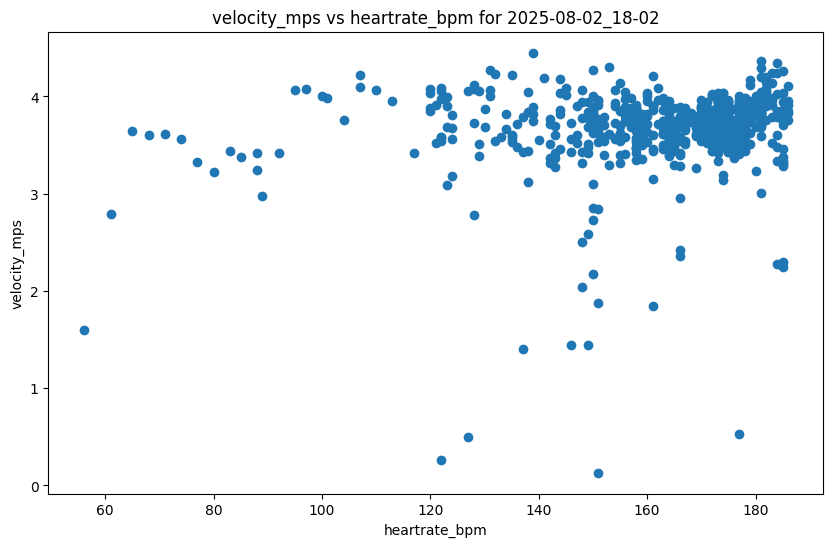

In [4]:
# date to analyze
date = "2025-08-02"

x = "heartrate_bpm"
y = "velocity_mps"

# x = "cadence_rpm"
# x = "grade_percent"
# x = "time_s"
# y = "altitude_m"
# y = "heartrate_bpm"
# y = "cadence_rpm"

# x_list = []
# y_list = []

# loop through all folders in the output folder
for folder_name in os.listdir(output_folder):
    if date in folder_name:
        # first read the csv file
        csv_file_path = os.path.join(output_folder, folder_name, f"{folder_name}_streams.csv")
        data = pd.read_csv(csv_file_path)

        # only look at when we are moving
        data = data[data["moving"] == True]

        # get the time and cadence columns
        x_data = data[x]
        y_data = data[y]

        # plot this data
        plt.figure(figsize=(10, 6))
        plt.scatter(x_data, y_data, label=folder_name)
        # plt.plot(x_data, y_data, label=folder_name)
        plt.xlabel(x)
        plt.ylabel(y)
        plt.title(f"{y} vs {x} for {folder_name}")
        plt.show()

